<!-- ![RWTH Logo](https://www.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaaagazb) -->
![iAMB Logo](https://www.iamb.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaanwtny)
# Strain characterization
## Version: 0.0.1
* Execute a single cell: <span class="fa-play fa"></span>
* Execute all cells: Menu: Run <span class="fa-chevron-right fa"></span> Run All Cells
* To reboot kernel: <span class="fa-refresh fa"></span>

Find more in the reference (menu: Help <span class="fa-chevron-right fa"></span> Jupyter Reference).

*Description of the workflow.*


### Libraries
Loading required libraries for analysis.

 - Input:  None
 - Output: Text: `Libraries loaded.`

In [1]:
import os
import pandas as pd
# import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline

# All files are attached with the current date
Today = date.today().strftime('%y%m%d')

# update version tag from title
version = '0.0.1'
print('Libraries loaded.')

Libraries loaded.


## Data loading and variables setup

Evaluate the next cell and browse to your Excel sheet. Once evaluated, you can change the source Excel file arbitrarily.

 1. Use the standard format for growth experiments, example file [here](https://git.rwth-aachen.de/ulf.liebal/iambanalyses/-/blob/38cb8d35a01c865e78076217253ee73c4108b367/RatesYields/GrowthExperiment_StandardFormat.xlsx) 
 2. Upload your data in the standard format into the folder `RatesYields`.
 3. Select the file in the browser. 
 
 - Input: Growth rate Excel Sheet
 - Output: None

In [5]:
# Output Files
# All files are attached with the current date
Today = date.today().strftime('%y%m%d')
# Choose image file type, e.g. svg, png, pdf, eps
ImageType = 'png'

# General Working Directory
# For automatic reading of directory, e.g. in cloud use:
Root_Dir = os.getcwd()
# remove the last directory fro Root_Dir
Root_Dir = os.path.dirname(Root_Dir)
Target_Dir = os.path.join(Root_Dir, 'Data', 'StrainScreen')

######################################
# input for the Excel file
File = 'Plate4.xlsx' # or Plate1.xlsx
######################################

FileAddress = os.path.join(Target_Dir, File)
Xls_df = pd.ExcelFile(FileAddress)
print('Excel sheets:\n{}'.format(Xls_df.sheet_names))

Excel sheets:
['Layout', 'OD600', 'PolyPScreen', 'Overview']


### Reading Data

In [6]:
# Choosing Excel sheets
Sheet1 = 'OD600'
Sheet2 = 'PolyPScreen'

# Loading data from sheet into python
df1 = pd.read_excel(FileAddress, sheet_name=Sheet1)
df1 = df1.dropna(how = 'all')
DelHeader = df1.columns[['Unnamed' in header for header in df1.columns]].values
df1 = df1.drop(DelHeader, axis=1)
df1['ODcorr'] = df1['OD600 1/10 Dilution'].apply(lambda x: x*10 if x>0.06 else x)

df2 = pd.read_excel(FileAddress, sheet_name=Sheet2)
df2 = df2.dropna(how = 'all')
DelHeader = df2.columns[['Unnamed' in header for header in df2.columns]].values
df2 = df2.drop(DelHeader, axis=1)
df2['FluorDiff'] = df2['FluorescenceWithCellsAfterIncubation'] - df2['FluorescenceOnlyJC-D7']
# Joining data from two sheets into one dataframe
df = pd.merge(df1, df2, on='Well', how='outer')
# df


### Scatter Plotting


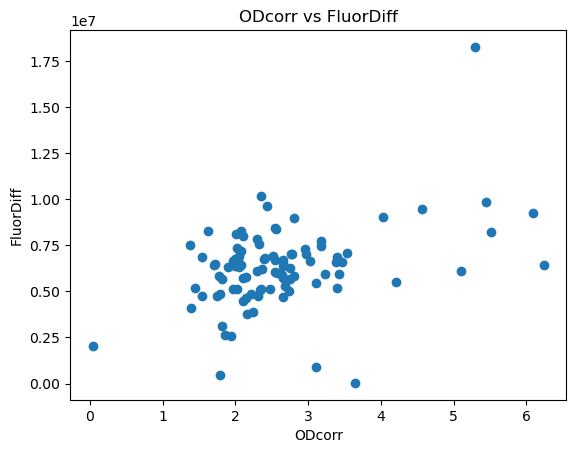

In [7]:
# Scatter Plotting
plt.scatter(df['ODcorr'], df['FluorDiff'])
plt.xlabel('ODcorr')
plt.ylabel('FluorDiff')
plt.title('ODcorr vs FluorDiff')
plt.show()
